# WGCNA加权基因共表达网络分析——关联基因模块与表型

> 本节概览   
> 1. WGCNA基本概念： 定义、关键术语、基本流程、一些注意事项   
> 2. WGCNA运行：    
> ⓪输入数据准备   
> ①判断数据质量，绘制样品的系统聚类树   
> ②挑选最佳阈值power   
> ③ 构建加权共表达网络（ 一步法和分步法），识别基因模块   
> ④ 关联基因模块与表型：模块与表型相关性热图、模块与表型相关性boxplot图、基因与模块、表型相关性散点图   
> ⑤ WGCNA的标配热图 ，模块相关性展示   
> ⑥ 对感兴趣模块的基因进行批量GO分析    
> ⑦ 感兴趣模块绘制热图    
> ⑧ 提取感兴趣模块的基因名, 导出基因至 VisANT 或 cytoscape作图   

简单来说，WGCNA其实相当于是对**多个复杂分组**进行的差异分析，用于找寻不同分组/表型的特征基因模块，从而进行下一步分析(如可以对模块内的基因进行GO富集、PPI分析等等). 其最最核心之处就在于能**将基因模块与样本表型进行关联**。


## 参考资料
WGCNA官方说明文档：

[WGCNA: R package for performing Weighted Gene Co-expression Network Analysis (ucla.edu)](https://link.zhihu.com/?target=https%3A//horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/index.html)

WGCNA文章链接：

算法—— [A general framework for weighted gene co-expression network analysis - PubMed (nih.gov)](https://link.zhihu.com/?target=https%3A//pubmed.ncbi.nlm.nih.gov/16646834/)

R包—— [WGCNA: an R package for weighted correlation network analysis - PMC (nih.gov)](https://link.zhihu.com/?target=https%3A//www.ncbi.nlm.nih.gov/pmc/articles/PMC2631488/)

官方英文教程：

[GBMTutorialHorvath.doc (ucla.edu) YeastTutorialHorvath.doc (ucla.edu)](https://link.zhihu.com/?target=https%3A//horvath.genetics.ucla.edu/html/GeneralFramework/GBMTutorialHorvath.pdf)

[FemaleLiver-02-networkConstr-man.pdf (ucla.edu)](https://link.zhihu.com/?target=https%3A//horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/FemaleLiver-02-networkConstr-man.pdf)（含分步法构建加权共表达网络）

注意事项： [WGCNA package: Frequently Asked Questions (ucla.edu)](https://link.zhihu.com/?target=https%3A//horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/faq.html)

优秀的中文教程：

[GEO/task4-NPC at master · jmzeng1314/GEO · GitHub](https://link.zhihu.com/?target=https%3A//github.com/jmzeng1314/GEO/tree/master/task4-NPC)

[一文看懂WGCNA 分析(2019更新版)](https://link.zhihu.com/?target=https%3A//cloud.tencent.com/developer/article/1516749)

[手把手10分文章WGCNA复现：小胶质细胞亚群在脑发育时髓鞘形成的作用](https://link.zhihu.com/?target=https%3A//mp.weixin.qq.com/s/VKOc5LpcWDuG_wZgBO1s2w)

[GitHub - jmzeng1314/my_WGCNA](https://link.zhihu.com/?target=https%3A//github.com/jmzeng1314/my_WGCNA)

[WGCNA分析，简单全面的最新教程](https://link.zhihu.com/?target=https%3A//cloud.tencent.com/developer/article/1936465)



## 1. WGCNA基本概念
### 1.1 定义
WGCNA（Weighted Gene Co-Expression Network Analysis ），即加权基因共表达网络分析，用于寻找高度相关的基因构成的`基因模块module`，利用`模块特征基因eigengene`（模块内第一主成分）或模块内的关键基因`Hub gene`来总结这些模块，将`模块与样本性状进行关联`。

### 1.2 其他关键术语
关键术语（Connectivity、Adjacency matrix、TOM等）见：

Simulated-00-Background.pdf (ucla.edu)

[一文看懂WGCNA](https://link.zhihu.com/?target=https%3A//cloud.tencent.com/developer/article/1516749) 分析 [WGCNA分析，简单全面的最新教程](https://link.zhihu.com/?target=https%3A//cloud.tencent.com/developer/article/1936465)

### 1.3 基本流程
构建基因共表达网络 >> 识别基因模块 >> 关联基因模块与表型 >> 研究基因模块间关系 >> 从感兴趣的基因模块中寻找关键驱动基因

<image src="../image/51.png">
<image src="../image/52.png">


## 1.4 一些注意事项
[WGCNA package: Frequently Asked Questions (ucla.edu)](https://link.zhihu.com/?target=https%3A//horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/faq.html)

- **样本数** >= 15
- **基因过滤方法** 采用均值、方差、中位数、绝对中位差MAD等方法，过滤低表达或样本间变化小的基因，但不建议用差异分析的方法进行过滤
- **输入数据形式** 如果有批次效应,需要先进行去除； 处理RNAseq数据，需要采用DESeq2的varianceStabilizingTransformation方法，或将基因标准化后的数据（如FPKM、CPM等）进行log2(x+1)转化
- **经验软阈值power** 当无向网络在power小于15或有向网络power小于30内，计算出的power无法达到要求时（即没有一个power值可以使无标度网络图谱结构R^2达到0.8且平均连接度降到100以下），可采用经验power值：

<image src="../image/53.png">

## 2. WGCNA运行
主要参考修改自以下代码：

[GEO/task4-NPC at master · jmzeng1314/GEO · GitHub](https://link.zhihu.com/?target=https%3A//github.com/jmzeng1314/GEO/tree/master/task4-NPC)

[手把手10分文章WGCNA复现：小胶质细胞亚群在脑发育时髓鞘形成的作用](https://link.zhihu.com/?target=https%3A//mp.weixin.qq.com/s/VKOc5LpcWDuG_wZgBO1s2w)

以下实战数据来自于[https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE154290](https://link.zhihu.com/?target=https%3A//www.ncbi.nlm.nih.gov/geo/query/acc.cgi%3Facc%3DGSE154290)，Supplementary file中的GSE154290_RNA.FPKM.txt.gz文件

<image src="../image/54.png">

### ⓪ 输入数据准备
读取`fpkm`表达矩阵，进行`log2(x+1)`转化；最后对矩阵进行转置，变成行为样品、列为基因的形式

```R
rm(list = ls())  
options(stringsAsFactors = F)
Sys.setenv(LANGUAGE = "en")
library(WGCNA)
library(FactoMineR)
library(factoextra)  
library(tidyverse) # ggplot2 stringer dplyr tidyr readr purrr  tibble forcats
library(data.table) #多核读取文件
dir.create('8.WGCNA')
setwd('8.WGCNA')
### 启用WGCNA多核计算
enableWGCNAThreads(nThreads = 0.75*parallel::detectCores()) 

################################# 0.输入数据准备 ################################
### 读取表达矩阵
if (T) {
  fpkm00 <- fread("../GSE154290_RNA.FPKM.txt.gz",data.table = F)
  ### 合并具有相同基因名的行
  table(duplicated(fpkm00$gene)) #统计重复基因名的基因
  gene <- fpkm00$gene ; fpkm00 <- fpkm00[,-1]
  fpkm0 <- aggregate(fpkm00, by=list(gene), FUN=sum)
  fpkm <- column_to_rownames(fpkm0,"Group.1")
}
data <- log2(fpkm+1)

### 筛选MAD前5000的基因
keep_data <- data[order(apply(data,1,mad), decreasing = T)[1:5000],]

### 创建datTraits，包含分组、表型等信息
datTraits <- data.frame(row.names = colnames(data),group=colnames(data))
fix(datTraits)

### 给分组加上编号
grouptype <- data.frame(group=sort(unique(datTraits$group)),
                       groupNo=1:length(unique(datTraits$group)))
# fix(grouptype)
datTraits$groupNo = "NA"
for(i in 1:nrow(grouptype)){
  datTraits[which(datTraits$group == grouptype$group[i]),'groupNo'] <- grouptype$groupNo[i]}
datTraits

### 转置
datExpr0 <- as.data.frame(t(keep_data))

```

In [104]:
rm(list = ls())
setwd("/slurm/home/admin/nlp/DL/97-bioinformatics/gene_process_for_python/data/salmon")
options(stringsAsFactors = F)
Sys.setenv(LANGUAGE = "en")
library(WGCNA)
library(FactoMineR)
library(factoextra)
library(tidyverse) # ggplot2 stringer dplyr tidyr readr purrr  tibble forcats
library(data.table) # 多核读取文件
dir.create("8.WGCNA")
setwd("8.WGCNA")
### 启用WGCNA多核计算
enableWGCNAThreads(nThreads = 0.75 * parallel::detectCores())


Warning message in dir.create("8.WGCNA"):
“'8.WGCNA' already exists”


Allowing parallel execution with up to 6 working processes.


In [105]:
ls()


character(0)

In [106]:
################################# 0.输入数据准备 ################################
### 读取表达矩阵
if (T) {
    fpkm00 <- fread("../../GSE154290_RNA.FPKM.txt.gz", data.table = F)
    ### 合并具有相同基因名的行
    table(duplicated(fpkm00$gene)) # 统计重复基因名的基因
    gene <- fpkm00$gene
    fpkm00 <- fpkm00[, -1]
    # head(fpkm00)
    fpkm0 <- aggregate(fpkm00, by = list(gene), FUN = sum)

    fpkm <- column_to_rownames(fpkm0, "Group.1") # 指定列设置为行索引。
}


In [107]:
ls()


[1] "fpkm"   "fpkm0"  "fpkm00" "gene"

In [108]:
data <- log2(fpkm + 1)
head(data)


,mESCs_rep1,mESCs_rep2,EpiLCs-rep1,EpiLCs-rep2,EpiSCs-rep1,EpiSCs-rep2,Epiblastoids-day2,Epiblastoids-day3,Epiblastoids-day4,fPSCs_P1,fPSCs_P10,fPSCs_P20,fPSCs_P30,fPSCs_CMT_P11,fPSCs_46C_P24,fPSCs_BVSC_P14,fPSCs_ROSAmTmG_P12,E5.5_fPSCs_P10,E6.5_fPSCs_P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-343C11.2,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000
00R_Pgap2,4.66185333,4.7336600,4.39210884,4.71033296,4.37310228,4.48554398,4.12270353,4.25116804,4.517226049,4.31148088,4.51799982,4.96714559,4.80792344,4.14735278,4.30951674,4.33987729,4.24371097,4.81591357,4.846119
0610009O20Rik,4.34582228,3.9441682,4.82097077,4.88074003,5.03053883,5.09539993,4.51716305,4.51685586,4.815275793,4.80685747,4.83758474,4.94027920,4.81759297,4.50172110,4.50161856,4.51486873,4.22488019,4.74321830,4.464000
1-Mar,0.02872614,0.1306239,0.03589975,0.01044329,0.07432731,0.05140273,0.01741741,0.03063836,0.110928450,0.08050895,0.05346032,0.02026252,0.01344511,0.04932408,0.02684254,0.08917948,0.02057545,0.03999744,0.000000
1-Sep,6.87687530,6.4293711,4.45086001,3.95544059,1.11131582,0.87030632,4.09257813,1.72521851,1.246061434,1.19544776,0.99435959,1.06204432,1.51998164,1.03275326,1.42567521,1.37099561,1.33408024,1.30433931,1.005227
10-Mar,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.03059316,0.00000000,0.00000000,0.006645593,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000


In [109]:
### 筛选MAD前5000的基因
keep_data <- data[order(apply(data, 1, mad), decreasing = T)[1:5000], ]

### 创建datTraits，包含分组、表型等信息
datTraits <- data.frame(row.names = colnames(data), group = colnames(data))
# fix(datTraits) ## 需要手动输入
ctr <- "naive"
exp <- "formative"
exp1 <- "primed"
datTraits$group <- c(ctr, ctr, exp, exp, exp1, exp1, exp, exp, exp, exp, exp, exp, exp, exp, exp, exp, exp, exp, exp)

head(datTraits)


,group
,<chr>
mESCs_rep1,naive
mESCs_rep2,naive
EpiLCs-rep1,formative
EpiLCs-rep2,formative
EpiSCs-rep1,primed
EpiSCs-rep2,primed


In [110]:
# custom_change <- function(x) {
#     if (x == ctr) {
#         1
#     } else if (x == exp) {
#         2
#     } else {
#         3
#     }
# }
# datTraits$groupNo <- lapply(datTraits$group, FUN = custom_change)

# head(datTraits)


In [111]:
### 给分组加上编号
grouptype <- data.frame(
    group = sort(unique(datTraits$group)),
    groupNo = 1:length(unique(datTraits$group))
)
# fix(grouptype)
grouptype


group,groupNo
<chr>,<int>
formative,1
naive,2
primed,3


In [112]:
datTraits$groupNo <- "NA"
for (i in 1:nrow(grouptype)) {
    datTraits[which(datTraits$group == grouptype$group[i]), "groupNo"] <- grouptype$groupNo[i]
}
head(datTraits)


,group,groupNo
,<chr>,<chr>
mESCs_rep1,naive,2
mESCs_rep2,naive,2
EpiLCs-rep1,formative,1
EpiLCs-rep2,formative,1
EpiSCs-rep1,primed,3
EpiSCs-rep2,primed,3


In [113]:
head(t(keep_data))


,Rps4l,Foxa2,Trim25,Rn7s2,Pga5,Hmgn2-ps1,Cyp26a1,Rn7s1,Ccnd2,Cer1,⋯,Mrps34,Ssbp3,Cdc73,Ibtk,Msl3l2,Chrac1,Zfp1,Bnip3l,Zgrf1,Ict1
mESCs_rep1,9.364239,0.00000000,5.019402,8.329729,3.1043372,1.199664,0.000000,8.615014,0.07077262,0.0000000,⋯,4.973798,3.204773,2.548518,4.092253,1.189475,3.886839,3.470314,4.560274,1.883031,4.959247
mESCs_rep2,9.361816,0.05717713,4.839792,10.747218,3.6812268,1.293418,0.000000,10.681172,0.24103962,0.0000000,⋯,5.372327,3.337484,2.852679,3.663817,1.036932,4.236858,3.555849,4.888410,2.088757,5.071970
EpiLCs-rep1,8.713411,0.29836740,4.267069,1.963335,0.0000000,6.376873,0.000000,1.872018,1.09129769,0.1437722,⋯,5.870853,5.900903,3.590798,4.469322,1.950021,3.508038,3.892652,4.579324,1.852818,3.544153
EpiLCs-rep2,9.241885,0.12629627,3.820633,3.256059,0.0000000,2.095296,0.000000,2.885387,0.72986944,0.0000000,⋯,6.139104,5.543977,3.425835,4.373150,2.217453,4.276472,3.763082,4.917200,2.051321,3.761461
EpiSCs-rep1,2.542505,3.71238316,2.628363,1.623698,0.7710615,3.562474,2.628462,1.368269,5.73316255,1.6183754,⋯,5.389302,6.511996,2.870072,3.456040,2.041343,3.956251,2.773357,4.746138,1.292282,4.271781
EpiSCs-rep2,2.427830,3.36911355,2.634759,1.820877,0.8610176,2.590056,3.197960,1.623713,5.09980927,1.4977886,⋯,6.047203,6.216100,2.655662,3.148852,1.967036,3.830026,2.826492,4.291499,1.185843,3.718221


In [114]:
### 转置
datExpr0 <- as.data.frame(t(keep_data))
head(datExpr0)


,Rps4l,Foxa2,Trim25,Rn7s2,Pga5,Hmgn2-ps1,Cyp26a1,Rn7s1,Ccnd2,Cer1,⋯,Mrps34,Ssbp3,Cdc73,Ibtk,Msl3l2,Chrac1,Zfp1,Bnip3l,Zgrf1,Ict1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mESCs_rep1,9.364239,0.00000000,5.019402,8.329729,3.1043372,1.199664,0.000000,8.615014,0.07077262,0.0000000,⋯,4.973798,3.204773,2.548518,4.092253,1.189475,3.886839,3.470314,4.560274,1.883031,4.959247
mESCs_rep2,9.361816,0.05717713,4.839792,10.747218,3.6812268,1.293418,0.000000,10.681172,0.24103962,0.0000000,⋯,5.372327,3.337484,2.852679,3.663817,1.036932,4.236858,3.555849,4.888410,2.088757,5.071970
EpiLCs-rep1,8.713411,0.29836740,4.267069,1.963335,0.0000000,6.376873,0.000000,1.872018,1.09129769,0.1437722,⋯,5.870853,5.900903,3.590798,4.469322,1.950021,3.508038,3.892652,4.579324,1.852818,3.544153
EpiLCs-rep2,9.241885,0.12629627,3.820633,3.256059,0.0000000,2.095296,0.000000,2.885387,0.72986944,0.0000000,⋯,6.139104,5.543977,3.425835,4.373150,2.217453,4.276472,3.763082,4.917200,2.051321,3.761461
EpiSCs-rep1,2.542505,3.71238316,2.628363,1.623698,0.7710615,3.562474,2.628462,1.368269,5.73316255,1.6183754,⋯,5.389302,6.511996,2.870072,3.456040,2.041343,3.956251,2.773357,4.746138,1.292282,4.271781
EpiSCs-rep2,2.427830,3.36911355,2.634759,1.820877,0.8610176,2.590056,3.197960,1.623713,5.09980927,1.4977886,⋯,6.047203,6.216100,2.655662,3.148852,1.967036,3.830026,2.826492,4.291499,1.185843,3.718221


### ① 判断数据质量，绘制样品的系统聚类树

```R
查看样本和基因的数据质量，去除低质量数据；绘制样品的系统聚类树，若存在一个显著离群点则需要剔除掉；还可以做PCA图查看样品分布情况

############################## 1.判断数据质量 ################################

### 判断数据质量--缺失值
gsg <- goodSamplesGenes(datExpr0,verbose = 3)
gsg$allOK
if (!gsg$allOK){
  # Optionally, print the gene and sample names that were removed:
  if (sum(!gsg$goodGenes)>0)
    printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes],
                                              collapse = ", ")));
  if (sum(!gsg$goodSamples)>0)
    printFlush(paste("Removing samples:",
                     paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
  # Remove the offending genes and samples from the data:
  datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}
gsg <- goodSamplesGenes(datExpr0,verbose = 3)
gsg$allOK

### 绘制样品的系统聚类树
if(T){
  #针对样本做聚类树
  sampleTree <- hclust(dist(datExpr0), method = "average")
  par(mar = c(0,5,2,0))
  plot(sampleTree, main = "Sample clustering", sub="", xlab="", cex.lab = 2, 
       cex.axis = 1, cex.main = 1,cex.lab=1)
  ## 若样本有性状、表型，可以添加对应颜色，查看是否聚类合理
  sample_colors <- numbers2colors(as.numeric(factor(datTraits$group)), 
                                  colors = rainbow(length(table(datTraits$group))), 
                                                   signed = FALSE)
  ## 绘制样品的系统聚类树及对应性状
  par(mar = c(1,4,3,1),cex=0.8)
  pdf("step1_Sample dendrogram and trait.pdf",width = 8,height = 6)
  plotDendroAndColors(sampleTree, sample_colors,
                      groupLabels = "trait",
                      cex.dendroLabels = 0.8,
                      marAll = c(1, 4, 3, 1),
                      cex.rowText = 0.01,
                      main = "Sample dendrogram and trait" )
  ## Plot a line to show the cut
  # abline(h = 23500, col = "red") #根据实际情况而定
  dev.off()
}

##若存在显著离群点；剔除掉
if(F){
  clust <- cutreeStatic(sampleTree, cutHeight = 23500, minSize = 10) # cutHeight根据实际情况而定
  table(clust)
  keepSamples <- (clust==1)
  datExpr0 <- datExpr0[keepSamples, ]
  datTraits <- datTraits[keepSamples,]
  dim(datExpr0) 
}

### 判断数据质量 : PCA进行分组查看
rm(list = ls())  
load("step1_input.Rdata")
group_list <- datTraits$group
dat.pca <- PCA(datExpr0, graph = F) 
pca <- fviz_pca_ind(dat.pca,
                    title = "Principal Component Analysis",
                    legend.title = "Groups",
                    geom.ind = c("point","text"), #"point","text"
                    pointsize = 2,
                    labelsize = 4,
                    repel = TRUE, #标签不重叠
                    col.ind = group_list, # 分组上色
                    axes.linetype=NA,  # remove axeslines
                    mean.point=F#去除分组中心点
                    ) +
  theme(legend.position = "none")+  # "none" REMOVE legend
  coord_fixed(ratio = 1) #坐标轴的纵横比
pca
ggsave(pca,filename= "step1_Sample PCA analysis.pdf", width = 8, height = 8)

##保存数据
datExpr <- datExpr0
nGenes <- ncol(datExpr)
nSamples <- nrow(datExpr)
save(nGenes,nSamples,datExpr,datTraits,file="step1_input.Rdata")
```

In [115]:
############################## 1.判断数据质量 ################################

### 判断数据质量--缺失值
gsg <- goodSamplesGenes(datExpr0, verbose = 3)
gsg$allOK
if (!gsg$allOK) {
  # Optionally, print the gene and sample names that were removed:
  if (sum(!gsg$goodGenes) > 0) {
    printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes],
      collapse = ", "
    )))
  }
  if (sum(!gsg$goodSamples) > 0) {
    printFlush(paste(
      "Removing samples:",
      paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")
    ))
  }
  # Remove the offending genes and samples from the data:
  datExpr0 <- datExpr0[gsg$goodSamples, gsg$goodGenes]
}
gsg <- goodSamplesGenes(datExpr0, verbose = 3)
gsg$allOK


 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

png 
  2

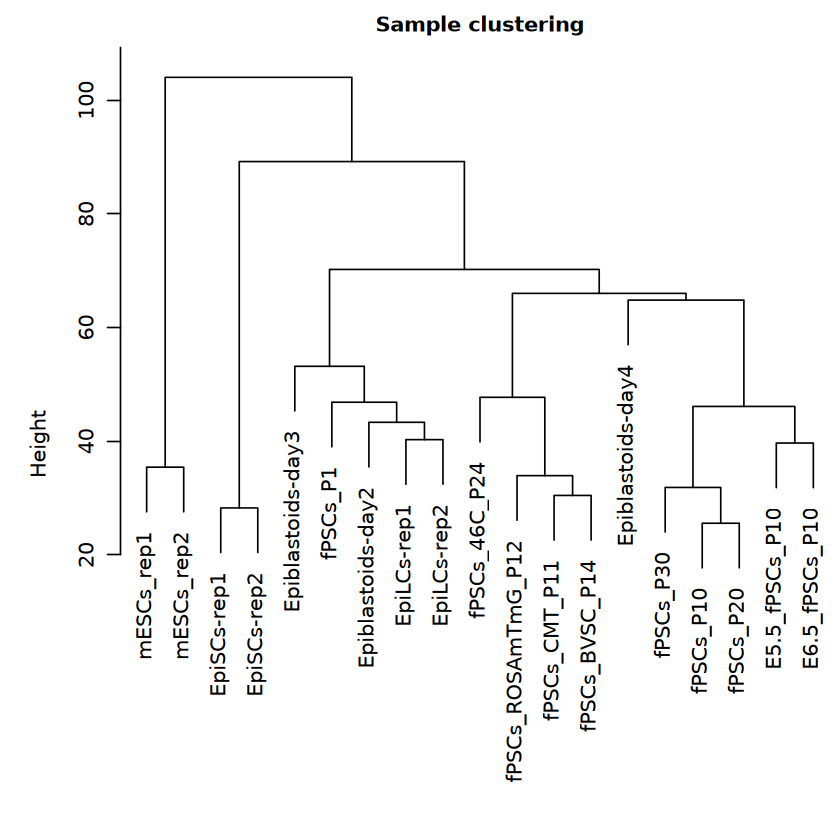

In [116]:
### 绘制样品的系统聚类树
if (T) {
    # 针对样本做聚类树
    sampleTree <- hclust(dist(datExpr0),
        method = "average"
    )
    par(mar = c(0, 5, 2, 0))
    plot(sampleTree,
        main = "Sample clustering", sub = "", xlab = "", cex.lab = 2,
        cex.axis = 1, cex.main = 1, cex.lab = 1
    )
    ## 若样本有性状、表型，可以添加对应颜色，查看是否聚类合理
    sample_colors <- numbers2colors(as.numeric(factor(datTraits$group)),
        colors = rainbow(length(table(datTraits$group))),
        signed = FALSE
    )
    ## 绘制样品的系统聚类树及对应性状
    par(mar = c(1, 4, 3, 1), cex = 0.8)
    pdf("step1_Sample dendrogram and trait.pdf", width = 8, height = 6)
    plotDendroAndColors(sampleTree, sample_colors,
        groupLabels = "trait",
        cex.dendroLabels = 0.8,
        marAll = c(1, 4, 3, 1),
        cex.rowText = 0.01,
        main = "Sample dendrogram and trait"
    )
    ## Plot a line to show the cut
    # abline(h = 23500, col = "red") #根据实际情况而定
    dev.off()
}


In [121]:
## 若存在显著离群点；剔除掉
if (F) {
  clust <- cutreeStatic(sampleTree,
    cutHeight = 23500,
    minSize = 10
  ) # cutHeight根据实际情况而定
  table(clust)
  keepSamples <- (clust == 1)
  datExpr0 <- datExpr0[keepSamples, ]
  datTraits <- datTraits[keepSamples, ]
  dim(datExpr0)
}
## 保存处理后的结果
save(datExpr0, datTraits, file = "step1_input.Rdata")


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


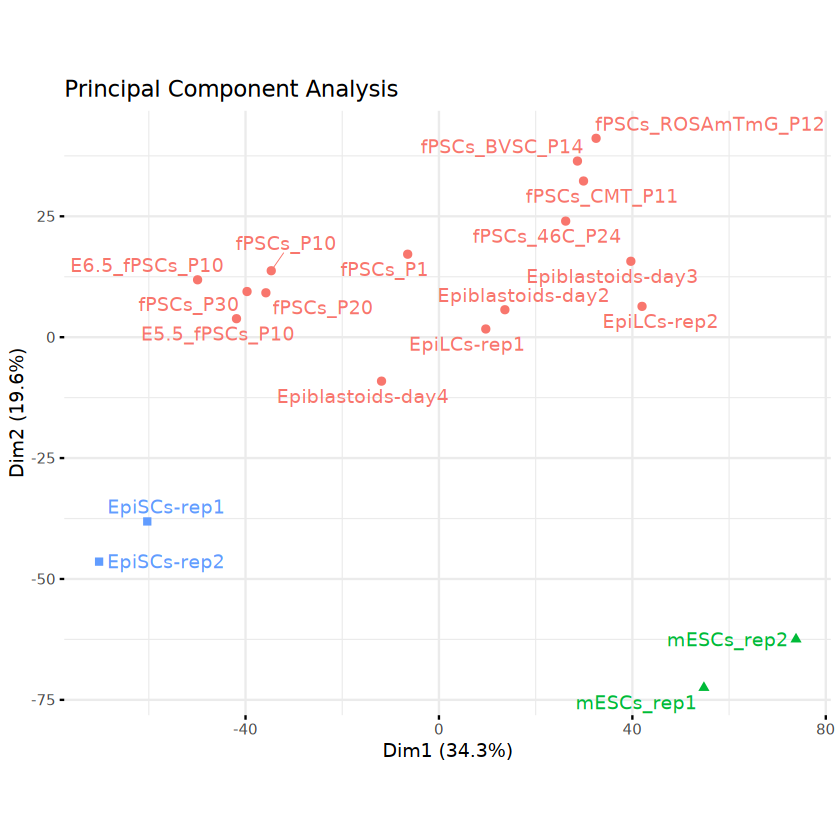

In [122]:
### 判断数据质量 : PCA进行分组查看
rm(list = ls())
load("step1_input.Rdata")
group_list <- datTraits$group
dat.pca <- PCA(datExpr0, graph = F)
pca <- fviz_pca_ind(dat.pca,
    title = "Principal Component Analysis",
    legend.title = "Groups",
    geom.ind = c("point", "text"), # "point","text"
    pointsize = 2,
    labelsize = 4,
    repel = TRUE, # 标签不重叠
    col.ind = group_list, # 分组上色
    axes.linetype = NA, # remove axeslines
    mean.point = F # 去除分组中心点
) +
    theme(legend.position = "none") + # "none" REMOVE legend
    coord_fixed(ratio = 1) # 坐标轴的纵横比
pca
ggsave(pca, filename = "step1_Sample PCA analysis_1.pdf", width = 8, height = 8)

## 保存数据
datExpr <- datExpr0
nGenes <- ncol(datExpr)
nSamples <- nrow(datExpr)
save(nGenes, nSamples, datExpr, datTraits, file = "step1_input.Rdata")


### ② 挑选最佳阈值power
挑选标准：`R^2 > 0.8` , `slope ≈ -1`，选择`R^2` 与` power`关系图的拐点处的`power`值

<image src="../image/55.png">

`sft$powerEstimate`可以给出所设定`R^2 cut-off`（默认为0.85）处的power值

```R
############################### 2.挑选最佳阈值power ###################################
rm(list = ls())  
load("step1_input.Rdata")
R.sq_cutoff = 0.8  #设置R^2 cut-off，默认为0.85
if(T){
  # Call the network topology analysis function
  #设置power参数选择范围
  powers <- c(seq(1,20,by = 1), seq(22,30,by = 2)) 
  sft <- pickSoftThreshold(datExpr, 
                           networkType = "unsigned",
                           powerVector = powers, 
                           RsquaredCut = R.sq_cutoff,  
                           verbose = 5)
  #SFT.R.sq > 0.8 , slope ≈ -1
  pdf("step2_power-value.pdf",width = 16,height = 12)
  # Plot the results: 寻找拐点，确认最终power取值
  par(mfrow = c(1,2));
  cex1 = 0.9;
  # Scale-free topology fit index as a function of the soft-thresholding power
  plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
       xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n")
  text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
       labels=powers,cex=cex1,col="red")
  # this line corresponds to using an R^2 cut-off of h
  abline(h=R.sq_cutoff ,col="red")
  # Mean connectivity as a function of the soft-thresholding power
  plot(sft$fitIndices[,1], sft$fitIndices[,5],
       xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n")
  text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")
  abline(h=100,col="red")
  dev.off()
}

sft$powerEstimate  #查看估计的最佳power
# power = sft$powerEstimate
power = 15

```

<image src="../image/56.png">


In [128]:
rm(list = ls())
load("step1_input.Rdata")


In [133]:
ls()
## 为了减少计算量
sampel_num <- 6
datExpr <- datExpr[1:sampel_num, ]
datTraits <- datTraits[1:sampel_num, ]
datTraits


[1] "datExpr"    "datTraits"  "nGenes"     "nSamples"   "sampel_num"

,group,groupNo
,<chr>,<chr>
mESCs_rep1,naive,2
mESCs_rep2,naive,2
EpiLCs-rep1,formative,1
EpiLCs-rep2,formative,1
EpiSCs-rep1,primed,3
EpiSCs-rep2,primed,3


In [ ]:
head


In [134]:
############################### 2.挑选最佳阈值power ###################################

R.sq_cutoff <- 0.8 # 设置R^2 cut-off，默认为0.85
if (T) {
    # Call the network topology analysis function
    # 设置power参数选择范围
    powers <- c(seq(1, 20, by = 1), seq(22, 30, by = 2))
    ## 软阈值的筛选
    sft <- pickSoftThreshold(datExpr,
        networkType = "unsigned",
        powerVector = powers,
        RsquaredCut = R.sq_cutoff,
        verbose = 5
    )
    # SFT.R.sq > 0.8 , slope ≈ -1
    pdf("step2_power-value.pdf",
        width = 16,
        height = 12
    )
    # Plot the results: 寻找拐点，确认最终power取值
    par(mfrow = c(1, 2))
    cex1 <- 0.9
    # Scale-free topology fit index as a function of the soft-thresholding power
    plot(sft$fitIndices[, 1], -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
        xlab = "Soft Threshold (power)", ylab = "Scale Free Topology Model Fit,signed R^2", type = "n"
    )
    text(sft$fitIndices[, 1], -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
        labels = powers, cex = cex1, col = "red"
    )
    # this line corresponds to using an R^2 cut-off of h
    abline(h = R.sq_cutoff, col = "red")
    # Mean connectivity as a function of the soft-thresholding power
    plot(sft$fitIndices[, 1], sft$fitIndices[, 5],
        xlab = "Soft Threshold (power)", ylab = "Mean Connectivity", type = "n"
    )
    text(sft$fitIndices[, 1], sft$fitIndices[, 5], labels = powers, cex = cex1, col = "red")
    abline(h = 100, col = "red")
    dev.off()
}


pickSoftThreshold: will use block size 5000.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 5000 of 5000


In [ ]:
sft$powerEstimate # 查看估计的最佳power
# power = sft$powerEstimate
power <- 15 ##

# 若无向网络在power小于15或有向网络power小于30内，没有一个power值使
# 无标度网络图谱结构R^2达到0.8且平均连接度在100以下，可能是由于
# 部分样品与其他样品差别太大。这可能由批次效应、样品异质性或实验条件对
# 表达影响太大等造成。可以通过绘制样品聚类查看分组信息和有无异常样品。
# 如果这确实是由有意义的生物变化引起的，也可以使用下面的经验power值。
if (is.na(power)) {
    # 官方推荐 "signed" 或 "signed hybrid"
    # 为与原文档一致，故未修改
    type <- "unsigned"
    nSamples <- nrow(datExpr)
    power <- ifelse(nSamples < 20, ifelse(type == "unsigned", 9, 18),
        ifelse(nSamples < 30, ifelse(type == "unsigned", 8, 16),
            ifelse(nSamples < 40, ifelse(type == "unsigned", 7, 14),
                ifelse(type == "unsigned", 6, 12)
            )
        )
    )
}

save(sft,
    power,
    file = "step2_power_value.Rdata"
)


### ③ 构建加权共表达网络，识别基因模块
构建加权共表达网络可选择`一步法（one step）`或 `分步法（step by step）`进行。 一般情况下优先选择采用简便的一步法，当想要调整得到的基因模块数目时，采用分步法更灵活

**一步法构建加权共表达网络，识别基因模块**
主要调整参数为`minModuleSize`和`mergeCutHeight` , 数值越大模块越少

```R
##################### 3.一步法构建加权共表达网络，识别基因模块 ####################
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
if(T){
  net <- blockwiseModules(
    datExpr,
    power = power,
    maxBlockSize = ncol(datExpr),
    corType = "pearson", #默认为"pearson","bicor"则更能考虑离群点的影响
    networkType = "unsigned",
    TOMType = "unsigned", 
    minModuleSize = 30,    ##越大模块越少
    mergeCutHeight = 0.25, ##越大模块越少
    numericLabels = TRUE, 
    saveTOMs = F,
    verbose = 3
  )
  table(net$colors) 
  # power: 上一步计算的软阈值
  # maxBlockSize:计算机能处理的最大模块的基因数量(默认5000),16G内存可以处理2万个，
  # 计算资源允许的情况下最好放在一个block里面。
  # corType：计算相关性的方法；可选pearson(默认)，bicor。后者更能考虑离群点的影响。
  # networkType:计算邻接矩阵时，是否考虑正负相关性；默认为"unsigned",可选"signed", "signed hybrid"
  # TOMType：计算TOM矩阵时，是否考虑正负相关性；默认为"signed",可选"unsigned"。但是根据幂律转换的邻接矩阵(权重)的非负性，所以认为这里选择"signed"也没有太多的意义。
  # numericLabels: 返回数字而不是颜色作为模块的名字，后面可以再转换为颜色
  # saveTOMs：最耗费时间的计算，可存储起来供后续使用，
  # mergeCutHeight: 合并模块的阈值，越大模块越少,一般为0.25
  # minModuleSize: 每个模块里最少放多少个基因，设定越大模块越少
  # 输出结果根据模块中基因数目的多少，降序排列，依次编号为 `1-最大模块数`。
  # **0 (grey)**表示**未**分入任何模块的基因。
}

## 模块可视化，层级聚类树展示各个模块
if(T){
  # Convert labels to colors for plotting
  moduleColors <- labels2colors(net$colors)
  table(moduleColors)
  # Plot the dendrogram and the module colors underneath
  pdf("step3_genes-modules_ClusterDendrogram.pdf",width = 16,height = 12)
  plotDendroAndColors(net$dendrograms[[1]], moduleColors[net$blockGenes[[1]]],
                      "Module colors",
                      dendroLabels = FALSE, hang = 0.03,
                      addGuide = TRUE, guideHang = 0.05)
  dev.off()
}
save(net, moduleColors, file = "step3_genes_modules.Rdata")
```

<image src="../image/57.png">

In [ ]:
##################### 3.一步法构建加权共表达网络，识别基因模块 ####################
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
if (T) {
    net <- blockwiseModules(
        datExpr,
        power = power,
        maxBlockSize = ncol(datExpr),
        corType = "pearson", # 默认为"pearson","bicor"则更能考虑离群点的影响
        networkType = "unsigned",
        TOMType = "unsigned",
        minModuleSize = 30, ## 越大模块越少
        mergeCutHeight = 0.25, ## 越大模块越少
        numericLabels = TRUE,
        saveTOMs = F,
        verbose = 3
    )
    table(net$colors)
    # power: 上一步计算的软阈值
    # maxBlockSize:计算机能处理的最大模块的基因数量(默认5000),16G内存可以处理2万个，
    # 计算资源允许的情况下最好放在一个block里面。
    # corType：计算相关性的方法；可选pearson(默认)，bicor。后者更能考虑离群点的影响。
    # networkType:计算邻接矩阵时，是否考虑正负相关性；默认为"unsigned",可选"signed", "signed hybrid"
    # TOMType：计算TOM矩阵时，是否考虑正负相关性；默认为"signed",可选"unsigned"。但是根据幂律转换的邻接矩阵(权重)的非负性，所以认为这里选择"signed"也没有太多的意义。
    # numericLabels: 返回数字而不是颜色作为模块的名字，后面可以再转换为颜色
    # saveTOMs：最耗费时间的计算，可存储起来供后续使用，
    # mergeCutHeight: 合并模块的阈值，越大模块越少,一般为0.25
    # minModuleSize: 每个模块里最少放多少个基因，设定越大模块越少
    # 输出结果根据模块中基因数目的多少，降序排列，依次编号为 `1-最大模块数`。
    # **0 (grey)**表示**未**分入任何模块的基因。
}

## 模块可视化，层级聚类树展示各个模块
if (T) {
    # Convert labels to colors for plotting
    moduleColors <- labels2colors(net$colors)
    table(moduleColors)
    # Plot the dendrogram and the module colors underneath
    pdf("step3_genes-modules_ClusterDendrogram.pdf", width = 16, height = 12)
    plotDendroAndColors(net$dendrograms[[1]], moduleColors[net$blockGenes[[1]]],
        "Module colors",
        dendroLabels = FALSE, hang = 0.03,
        addGuide = TRUE, guideHang = 0.05
    )
    dev.off()
}
save(net, moduleColors, file = "step3_genes_modules.Rdata")


**分步法构建加权共表达网络，识别基因模块**
与一步法类似，主要调整参数为`minModuleSize`和`MEDissThres` , 数值越大模块越少


```R
#####################  分布法完成网络构建，一般不用 #################################
if(F){
  ## 构建加权共表达网络分为两步：
  ## 1. 计算邻近值，也是就是两个基因在不同样品中表达量的表达相关系数(pearson correlation rho)，
  ## 2. 计算topology overlap similarity (TOM)。 用TOM表示两个基因在网络结构上的相似性，即两个基因如果具有相似的邻近基因，这两个基因更倾向于有相互作用。

  ###(1)网络构建 Co-expression similarity and adjacency 
  adjacency = adjacency(datExpr, power = power) 

  ###(2) 邻近矩阵到拓扑矩阵的转换，Turn adjacency into topological overlap
  TOM = TOMsimilarity(adjacency)
  dissTOM = 1-TOM

  ###(3) 聚类拓扑矩阵 Clustering using TOM
  # Call the hierarchical clustering function
  geneTree = hclust(as.dist(dissTOM), method = "average");
  # Plot the resulting clustering tree (dendrogram)
  ## 这个时候的geneTree与一步法的 net$dendrograms[[1]] 性质类似，但是还需要进行进一步处理
  plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
       labels = FALSE, hang = 0.04)

  ###(4) 聚类分支的修整 dynamicTreeCut 
  ################# set the minimum module size ##############################
  minModuleSize = 30
  ####
  # Module identification using dynamic tree cut:
  dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                              deepSplit = 2, pamRespectsDendro = FALSE,
                              minClusterSize = minModuleSize)
  table(dynamicMods)
  # Convert numeric lables into colors
  dynamicColors = labels2colors(dynamicMods)
  table(dynamicColors)
  # Plot the dendrogram and colors underneath
  plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                      dendroLabels = FALSE, hang = 0.03,
                      addGuide = TRUE, guideHang = 0.05,
                      main = "Gene dendrogram and module colors")

  ###(5) 聚类结果相似模块的融合 Merging of modules whose expression profiles are very similar
  # Calculate eigengenes
  MEList = moduleEigengenes(datExpr, colors = dynamicColors)
  MEs = MEList$eigengenes
  # Calculate dissimilarity of module eigengenes
  MEDiss = 1-cor(MEs)
  # Cluster module eigengenes
  METree = hclust(as.dist(MEDiss), method = "average")
  #一般选择 height cut 为0.25,对应于有75%相关性，进行融合
  ###################### set  Merging height cut  ################################
  MEDissThres = 0.5
  ####
  # Plot the result
  plot(METree, main = "Clustering of module eigengenes",
       xlab = "", sub = "")
  # Plot the cut line into the dendrogram
  abline(h=MEDissThres, col = "red")
  # Call an automatic merging function
  merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
  # The merged module colors
  mergedColors = merge$colors
  # Eigengenes of the new merged modules:
  mergedMEs = merge$newMEs
  # 统计mergedmodule
  table(mergedColors)

  ### (6) plot the gene dendrogram 
  pdf(file = "step3_stepbystep_DynamicTreeCut_genes-modules.pdf", width = 16,height = 12)
  plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                      c("Dynamic Tree Cut", "Merged dynamic"),
                      dendroLabels = FALSE, hang = 0.03,
                      addGuide = TRUE, guideHang = 0.05)
  dev.off()

  ### 保存数据
  # Rename to moduleColors
  moduleColors = mergedColors
  # Construct numerical labels corresponding to the colors
  colorOrder = c("grey", standardColors(50))
  moduleLabels = match(moduleColors, colorOrder)-1
  MEs = mergedMEs
  # Save module colors and labels for use in subsequent parts
  save(MEs, moduleLabels, moduleColors, geneTree, 
       file = "step3_stepByStep_genes_modules.Rdata")

}
```

<image src="../image/58.png">

In [ ]:
#####################  分布法完成网络构建，一般不用 #################################
if (F) {
    ## 构建加权共表达网络分为两步：
    ## 1. 计算邻近值，也是就是两个基因在不同样品中表达量的表达相关系数(pearson correlation rho)，
    ## 2. 计算topology overlap similarity (TOM)。 用TOM表示两个基因在网络结构上的相似性，即两个基因如果具有相似的邻近基因，这两个基因更倾向于有相互作用。

    ### (1)网络构建 Co-expression similarity and adjacency
    adjacency <- adjacency(datExpr, power = power)

    ### (2) 邻近矩阵到拓扑矩阵的转换，Turn adjacency into topological overlap
    TOM <- TOMsimilarity(adjacency)
    dissTOM <- 1 - TOM

    ### (3) 聚类拓扑矩阵 Clustering using TOM
    # Call the hierarchical clustering function
    geneTree <- hclust(as.dist(dissTOM), method = "average")
    # Plot the resulting clustering tree (dendrogram)
    ## 这个时候的geneTree与一步法的 net$dendrograms[[1]] 性质类似，但是还需要进行进一步处理
    plot(geneTree,
        xlab = "", sub = "", main = "Gene clustering on TOM-based dissimilarity",
        labels = FALSE, hang = 0.04
    )

    ### (4) 聚类分支的修整 dynamicTreeCut
    ################# set the minimum module size ##############################
    minModuleSize <- 30
    ####
    # Module identification using dynamic tree cut:
    dynamicMods <- cutreeDynamic(
        dendro = geneTree, distM = dissTOM,
        deepSplit = 2, pamRespectsDendro = FALSE,
        minClusterSize = minModuleSize
    )
    table(dynamicMods)
    # Convert numeric lables into colors
    dynamicColors <- labels2colors(dynamicMods)
    table(dynamicColors)
    # Plot the dendrogram and colors underneath
    plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
        dendroLabels = FALSE, hang = 0.03,
        addGuide = TRUE, guideHang = 0.05,
        main = "Gene dendrogram and module colors"
    )

    ### (5) 聚类结果相似模块的融合 Merging of modules whose expression profiles are very similar
    # Calculate eigengenes
    MEList <- moduleEigengenes(datExpr, colors = dynamicColors)
    MEs <- MEList$eigengenes
    # Calculate dissimilarity of module eigengenes
    MEDiss <- 1 - cor(MEs)
    # Cluster module eigengenes
    METree <- hclust(as.dist(MEDiss), method = "average")
    # 一般选择 height cut 为0.25,对应于有75%相关性，进行融合
    ###################### set  Merging height cut  ################################
    MEDissThres <- 0.5
    ####
    # Plot the result
    plot(METree,
        main = "Clustering of module eigengenes",
        xlab = "", sub = ""
    )
    # Plot the cut line into the dendrogram
    abline(h = MEDissThres, col = "red")
    # Call an automatic merging function
    merge <- mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
    # The merged module colors
    mergedColors <- merge$colors
    # Eigengenes of the new merged modules:
    mergedMEs <- merge$newMEs
    # 统计mergedmodule
    table(mergedColors)

    ### (6) plot the gene dendrogram
    pdf(file = "step3_stepbystep_DynamicTreeCut_genes-modules.pdf", width = 16, height = 12)
    plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
        c("Dynamic Tree Cut", "Merged dynamic"),
        dendroLabels = FALSE, hang = 0.03,
        addGuide = TRUE, guideHang = 0.05
    )
    dev.off()

    ### 保存数据
    # Rename to moduleColors
    moduleColors <- mergedColors
    # Construct numerical labels corresponding to the colors
    colorOrder <- c("grey", standardColors(50))
    moduleLabels <- match(moduleColors, colorOrder) - 1
    MEs <- mergedMEs
    # Save module colors and labels for use in subsequent parts
    save(MEs, moduleLabels, moduleColors, geneTree,
        file = "step3_stepByStep_genes_modules.Rdata"
    )
}


### ④ 关联基因模块与表型

绘制模块与表型的**相关性热图**、**模块与表型的相关性boxplot图**、**基因与模块**、**表型的相关性散点图**； 结合所得各类相关性结果，判断出哪些模块与表型是高度相关的，从而关联基因模块与表型。

这里示范在绘制基因与模块、表型的相关性散点图时，选择要查看的离散性状的表型是“primed”

```R
####################### 4.关联基因模块与表型 #####################################
rm(list = ls())  
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")

## 模块与表型的相关性热图
if(T){
  datTraits$group <- as.factor(datTraits$group)
  design <- model.matrix(~0+datTraits$group)
  colnames(design) <- levels(datTraits$group) #get the group
  MES0 <- moduleEigengenes(datExpr,moduleColors)$eigengenes  #Calculate module eigengenes.
  MEs <- orderMEs(MES0)  #Put close eigenvectors next to each other
  moduleTraitCor <- cor(MEs,design,use = "p")
  moduleTraitPvalue <- corPvalueStudent(moduleTraitCor,nSamples)
  textMatrix <- paste0(signif(moduleTraitCor,2),"\n(",
                      signif(moduleTraitPvalue,1),")")
  dim(textMatrix) <- dim(moduleTraitCor)

  pdf("step4_Module-trait-relationship_heatmap.pdf",
      width = 2*length(colnames(design)), 
      height = 0.6*length(names(MEs)) )
  par(mar=c(5, 9, 3, 3)) #留白：下、左、上、右
  labeledHeatmap(Matrix = moduleTraitCor,
                 xLabels = colnames(design),
                 yLabels = names(MEs),
                 ySymbols = names(MEs),
                 colorLabels = F,
                 colors = blueWhiteRed(50),
                 textMatrix = textMatrix,
                 setStdMargins = F,
                 cex.text = 0.5,
                 zlim = c(-1,1), 
                 main = "Module-trait relationships")
  dev.off()
  save(design, file = "step4_design.Rdata")
}


### 模块与表型的相关性boxplot图 
if(T){
mes_group <- merge(MEs,datTraits,by="row.names") 
library(gplots)
library(ggpubr)
library(grid)
library(gridExtra) 
draw_ggboxplot <- function(data,Module="Module",group="group"){
  ggboxplot(data,x=group, y=Module,
            ylab = paste0(Module),
            xlab = group,
            fill = group,
            palette = "jco",
            #add="jitter",
            legend = "") +stat_compare_means()
}
# 批量画boxplot
colorNames <- names(MEs)
pdf("step4_Module-trait-relationship_boxplot.pdf", width = 7.5,height = 1.6*ncol(MEs))
p <- lapply(colorNames,function(x) {
  draw_ggboxplot(mes_group, Module = x, group = "group")
})
do.call(grid.arrange,c(p,ncol=2)) #排布为每行2个
dev.off()
}


### 基因与模块、表型的相关性散点图
#所有的模块都可以跟基因算出相关系数，所有的连续型性状也可以跟基因算出相关系数， 
#如果跟性状显著相关的基因也跟某个模块显著相关，那么这些基因可能就非常重要。

# 选择离散性状的表型
levels(datTraits$group)
choose_group <- "primed"  

if(T){
  modNames <- substring(names(MEs), 3)

  ### 计算模块与基因的相关性矩阵 
  ## Module Membership: 模块内基因表达与模块特征值的相关性
  geneModuleMembership <- as.data.frame(cor(datExpr, MEs, use = "p"))
  MMPvalue <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples))
  names(geneModuleMembership) <- paste0("MM", modNames)
  names(MMPvalue) <- paste0("p.MM", modNames)

  ###  计算性状与基因的相关性矩阵 
  ## Gene significance，GS：比较样本某个基因与对应表型的相关性
  ## 连续型性状
  # trait <- datTraits$groupNo  
  ## 非连续型性状，需转为0-1矩阵, 已存于design中
  trait <- as.data.frame(design[,choose_group])
  geneTraitSignificance <- as.data.frame(cor(datExpr,trait,use = "p"))
  GSPvalue <- as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance),nSamples))
  names(geneTraitSignificance) <- paste0("GS")
  names(GSPvalue) <- paste0("GS")

  ### 可视化基因与模块、表型的相关性.
  #selectModule<-c("blue","green","purple","grey")  ##可以选择自己想要的模块
  selectModule <- modNames  ## 全部模块批量作图
  pdf("step4_gene-Module-trait-significance.pdf",width=7, height=1.5*ncol(MEs))
  par(mfrow=c(ceiling(length(selectModule)/2),2)) #批量作图开始
  for(module in selectModule){
    column <- match(module,selectModule)
    print(module)
    moduleGenes <- moduleColors==module
    verboseScatterplot(abs(geneModuleMembership[moduleGenes, column]),
                       abs(geneTraitSignificance[moduleGenes, 1]),
                       xlab = paste("Module Membership in", module, "module"),
                       ylab = "Gene significance for trait",
                       main = paste("Module membership vs. gene significance\n"),
                       cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module)
  }
  dev.off()
}
```

<image src="../image/59.png">

<image src="../image/60.png">

<image src="../image/61.png">

通过以上可发现，与primed表型相关密切的模块有royalblue、blue等

In [ ]:
####################### 4.关联基因模块与表型 #####################################
rm(list = ls())
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")

## 模块与表型的相关性热图
if (T) {
    datTraits$group <- as.factor(datTraits$group)
    design <- model.matrix(~ 0 + datTraits$group)
    colnames(design) <- levels(datTraits$group) # get the group
    MES0 <- moduleEigengenes(datExpr, moduleColors)$eigengenes # Calculate module eigengenes.
    MEs <- orderMEs(MES0) # Put close eigenvectors next to each other
    moduleTraitCor <- cor(MEs, design, use = "p")
    moduleTraitPvalue <- corPvalueStudent(moduleTraitCor, nSamples)
    textMatrix <- paste0(
        signif(moduleTraitCor, 2), "\n(",
        signif(moduleTraitPvalue, 1), ")"
    )
    dim(textMatrix) <- dim(moduleTraitCor)

    pdf("step4_Module-trait-relationship_heatmap.pdf",
        width = 2 * length(colnames(design)),
        height = 0.6 * length(names(MEs))
    )
    par(mar = c(5, 9, 3, 3)) # 留白：下、左、上、右
    labeledHeatmap(
        Matrix = moduleTraitCor,
        xLabels = colnames(design),
        yLabels = names(MEs),
        ySymbols = names(MEs),
        colorLabels = F,
        colors = blueWhiteRed(50),
        textMatrix = textMatrix,
        setStdMargins = F,
        cex.text = 0.5,
        zlim = c(-1, 1),
        main = "Module-trait relationships"
    )
    dev.off()
    save(design, file = "step4_design.Rdata")
}


### 模块与表型的相关性boxplot图
if (T) {
    mes_group <- merge(MEs, datTraits, by = "row.names")
    library(gplots)
    library(ggpubr)
    library(grid)
    library(gridExtra)
    draw_ggboxplot <- function(data, Module = "Module", group = "group") {
        ggboxplot(data,
            x = group, y = Module,
            ylab = paste0(Module),
            xlab = group,
            fill = group,
            palette = "jco",
            # add="jitter",
            legend = ""
        ) + stat_compare_means()
    }
    # 批量画boxplot
    colorNames <- names(MEs)
    pdf("step4_Module-trait-relationship_boxplot.pdf", width = 7.5, height = 1.6 * ncol(MEs))
    p <- lapply(colorNames, function(x) {
        draw_ggboxplot(mes_group, Module = x, group = "group")
    })
    do.call(grid.arrange, c(p, ncol = 2)) # 排布为每行2个
    dev.off()
}


### 基因与模块、表型的相关性散点图
# 所有的模块都可以跟基因算出相关系数，所有的连续型性状也可以跟基因算出相关系数，
# 如果跟性状显著相关的基因也跟某个模块显著相关，那么这些基因可能就非常重要。

# 选择离散性状的表型
levels(datTraits$group)
choose_group <- "primed"

if (T) {
    modNames <- substring(names(MEs), 3)

    ### 计算模块与基因的相关性矩阵
    ## Module Membership: 模块内基因表达与模块特征值的相关性
    geneModuleMembership <- as.data.frame(cor(datExpr, MEs, use = "p"))
    MMPvalue <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples))
    names(geneModuleMembership) <- paste0("MM", modNames)
    names(MMPvalue) <- paste0("p.MM", modNames)

    ###  计算性状与基因的相关性矩阵
    ## Gene significance，GS：比较样本某个基因与对应表型的相关性
    ## 连续型性状
    # trait <- datTraits$groupNo
    ## 非连续型性状，需转为0-1矩阵, 已存于design中
    trait <- as.data.frame(design[, choose_group])
    geneTraitSignificance <- as.data.frame(cor(datExpr, trait, use = "p"))
    GSPvalue <- as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples))
    names(geneTraitSignificance) <- paste0("GS")
    names(GSPvalue) <- paste0("GS")

    ### 可视化基因与模块、表型的相关性.
    # selectModule<-c("blue","green","purple","grey")  ##可以选择自己想要的模块
    selectModule <- modNames ## 全部模块批量作图
    pdf("step4_gene-Module-trait-significance.pdf", width = 7, height = 1.5 * ncol(MEs))
    par(mfrow = c(ceiling(length(selectModule) / 2), 2)) # 批量作图开始
    for (module in selectModule) {
        column <- match(module, selectModule)
        print(module)
        moduleGenes <- moduleColors == module
        verboseScatterplot(abs(geneModuleMembership[moduleGenes, column]),
            abs(geneTraitSignificance[moduleGenes, 1]),
            xlab = paste("Module Membership in", module, "module"),
            ylab = "Gene significance for trait",
            main = paste("Module membership vs. gene significance\n"),
            cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module
        )
    }
    dev.off()
}


### ⑤ WGCNA可视化：TOMplot 、Eigengene-adjacency-heatmap
WGCNA的标配热图TOMplot / Network heapmap plot，描绘了分析中所有基因之间的拓扑重叠矩阵（TOM），颜色越深表示基因之间的相关性越大； Eigengene-adjacency-heatmap 展示基因模块之间的相关性，还可以加入表型信息，查看表型与哪些模块相关性高

```R
#########################  5. WGCNA可视化：TOMplot  Eigengene-adjacency-heatmap ##################################
rm(list = ls())  
load(file = 'step1_input.Rdata')
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")
load(file = "step4_design.Rdata")

if(T){
  TOM=TOMsimilarityFromExpr(datExpr,power=power)
  dissTOM=1-TOM
  ## draw all genes 
  if(T){
    geneTree = net$dendrograms[[1]]
    plotTOM = dissTOM^7
    diag(plotTOM)=NA
    png("step5_TOMplot_Network-heatmap.png",width = 800, height=600) 
    TOMplot(plotTOM,geneTree,moduleColors,
            col=gplots::colorpanel(250,'red',"orange",'lemonchiffon'),
            main="Network heapmap plot")
    dev.off()
  }
  ### draw selected genes to save time...just for test...
  if(F){
    nSelect =0.1*nGenes
    set.seed(123)
    select=sample(nGenes,size = nSelect)
    selectTOM = dissTOM[select,select]
    selectTree = hclust(as.dist(selectTOM),method = "average")
    selectColors = moduleColors[select]
    plotDiss=selectTOM^7
    diag(plotDiss)=NA
    pdf("step5_select_TOMplot_Network-heatmap.pdf",width=8, height=6)
    TOMplot(plotDiss,selectTree,selectColors,
            col=gplots::colorpanel(250,'red',"orange",'lemonchiffon'),
            main="Network heapmap plot of selected gene")
    dev.off()
  }
}


### 模块相关性展示 Eigengene-adjacency-heatmap
if(T){
  MEs = moduleEigengenes(datExpr,moduleColors)$eigengenes
  MET = orderMEs(MEs)
  # 若添加表型数据
  if(T){
    ## 连续型性状
    # MET = orderMEs(cbind(MEs,datTraits$groupNo))
    ## 非连续型性状，需将是否属于这个表型进行0,1数值化，已存于design中
    design
    primed = as.data.frame(design[,3])
    names(primed) = "primed"
    # Add the weight to existing module eigengenes
    MET = orderMEs(cbind(MEs, primed))
  }
  pdf("step5_module_cor_Eigengene-dendrogram.pdf",width = 8,height = 10)
  plotEigengeneNetworks(MET, setLabels="", 
                        marDendro = c(0,4,1,4),  # 留白：下右上左
                        marHeatmap = c(5,5,1,2), # 留白：下右上左
                        cex.lab = 0.8,
                        xLabelsAngle = 90)
  dev.off()
}

```

<image src="../image/62.png">
<image src="../image/63.png">
从上图可以发现，primed表型与"royalblue"模块聚类是最接近的


In [ ]:
#########################  5. WGCNA可视化：TOMplot  Eigengene-adjacency-heatmap ##################################
rm(list = ls())
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")
load(file = "step4_design.Rdata")

if (T) {
    TOM <- TOMsimilarityFromExpr(datExpr, power = power)
    dissTOM <- 1 - TOM
    ## draw all genes
    if (T) {
        geneTree <- net$dendrograms[[1]]
        plotTOM <- dissTOM^7
        diag(plotTOM) <- NA
        png("step5_TOMplot_Network-heatmap.png", width = 800, height = 600)
        TOMplot(plotTOM, geneTree, moduleColors,
            col = gplots::colorpanel(250, "red", "orange", "lemonchiffon"),
            main = "Network heapmap plot"
        )
        dev.off()
    }
    ### draw selected genes to save time...just for test...
    if (F) {
        nSelect <- 0.1 * nGenes
        set.seed(123)
        select <- sample(nGenes, size = nSelect)
        selectTOM <- dissTOM[select, select]
        selectTree <- hclust(as.dist(selectTOM), method = "average")
        selectColors <- moduleColors[select]
        plotDiss <- selectTOM^7
        diag(plotDiss) <- NA
        pdf("step5_select_TOMplot_Network-heatmap.pdf", width = 8, height = 6)
        TOMplot(plotDiss, selectTree, selectColors,
            col = gplots::colorpanel(250, "red", "orange", "lemonchiffon"),
            main = "Network heapmap plot of selected gene"
        )
        dev.off()
    }
}


### 模块相关性展示 Eigengene-adjacency-heatmap
if (T) {
    MEs <- moduleEigengenes(datExpr, moduleColors)$eigengenes
    MET <- orderMEs(MEs)
    # 若添加表型数据
    if (T) {
        ## 连续型性状
        # MET = orderMEs(cbind(MEs,datTraits$groupNo))
        ## 非连续型性状，需将是否属于这个表型进行0,1数值化，已存于design中
        design
        primed <- as.data.frame(design[, 3])
        names(primed) <- "primed"
        # Add the weight to existing module eigengenes
        MET <- orderMEs(cbind(MEs, primed))
    }
    pdf("step5_module_cor_Eigengene-dendrogram.pdf", width = 8, height = 10)
    plotEigengeneNetworks(MET,
        setLabels = "",
        marDendro = c(0, 4, 1, 4), # 留白：下右上左
        marHeatmap = c(5, 5, 1, 2), # 留白：下右上左
        cex.lab = 0.8,
        xLabelsAngle = 90
    )
    dev.off()
}


### ⑥ 对感兴趣模块的基因进行GO分析
这里选取了与表型相关度较高的`"black","pink","royalblue"`模块进行GO分析

```R
#################### 6. 选择感兴趣基因模块进行GO分析 ####################
rm(list = ls())  
load(file = 'step1_input.Rdata')
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")
load(file = "step4_design.Rdata")

### 条件设置
OrgDb = "org.Mm.eg.db"  # "org.Mm.eg.db"  "org.Hs.eg.db"
genetype = "SYMBOL"    # "SYMBOL"   "ENSEMBL"
table(moduleColors)
choose_module <- c("black","pink","royalblue")

if(T){
  library(clusterProfiler)
  library(org.Mm.eg.db)
  library(org.Hs.eg.db)

  gene_module <- data.frame(gene=colnames(datExpr),
                            module=moduleColors)
  write.csv(gene_module,file = "step6_gene_moduleColors.csv",row.names = F, quote = F) 
  tmp <- bitr(gene_module$gene,fromType = genetype,  # "SYMBOL"   "ENSEMBL"
              toType = "ENTREZID",
              OrgDb = OrgDb )
  gene_module_entrz <- merge(tmp,gene_module, by.x=genetype, by.y="gene")

  choose_gene_module_entrz <- gene_module_entrz[gene_module_entrz$module %in% choose_module,]

  ###run go analysis
  formula_res <- compareCluster(
    ENTREZID~module,
    data = choose_gene_module_entrz,
    fun = "enrichGO",
    OrgDb = OrgDb,
    ont = "BP",  #One of "BP", "MF", and "CC"  or "ALL"
    pAdjustMethod = "BH",
    pvalueCutoff = 0.25,
    qvalueCutoff = 0.25
  )

  ###精简GO富集的结果,去冗余
  lineage1_ego <- simplify( 
    formula_res,
    cutoff=0.5,
    by="p.adjust",
    select_fun=min
  )
  save(gene_module, formula_res, lineage1_ego, file="step6_module_GO_term.Rdata")
  write.csv(lineage1_ego@compareClusterResult,
            file="step6_module_GO_term.csv")
  ### 绘制dotplot图
  dotp <- dotplot(lineage1_ego,
                  showCategory=10,
                  includeAll = TRUE, #将有overlap的结果也展示出来
                  label_format=90)
  ggsave(dotp,filename= "step6_module_GO_term.pdf", #device = cairo_pdf,
         width = 12, 
         height = 15)
}
```

<image src="../image/64.png">

In [ ]:
#################### 6. 选择感兴趣基因模块进行GO分析 ####################
rm(list = ls())
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")
load(file = "step4_design.Rdata")

### 条件设置
OrgDb <- "org.Mm.eg.db" # "org.Mm.eg.db"  "org.Hs.eg.db"
genetype <- "SYMBOL" # "SYMBOL"   "ENSEMBL"
table(moduleColors)
choose_module <- c("black", "pink", "royalblue")

if (T) {
    library(clusterProfiler)
    library(org.Mm.eg.db)
    library(org.Hs.eg.db)

    gene_module <- data.frame(
        gene = colnames(datExpr),
        module = moduleColors
    )
    write.csv(gene_module, file = "step6_gene_moduleColors.csv", row.names = F, quote = F)
    tmp <- bitr(gene_module$gene,
        fromType = genetype, # "SYMBOL"   "ENSEMBL"
        toType = "ENTREZID",
        OrgDb = OrgDb
    )
    gene_module_entrz <- merge(tmp, gene_module, by.x = genetype, by.y = "gene")

    choose_gene_module_entrz <- gene_module_entrz[gene_module_entrz$module %in% choose_module, ]

    ### run go analysis
    formula_res <- compareCluster(
        ENTREZID ~ module,
        data = choose_gene_module_entrz,
        fun = "enrichGO",
        OrgDb = OrgDb,
        ont = "BP", # One of "BP", "MF", and "CC"  or "ALL"
        pAdjustMethod = "BH",
        pvalueCutoff = 0.25,
        qvalueCutoff = 0.25
    )

    ### 精简GO富集的结果,去冗余
    lineage1_ego <- simplify(
        formula_res,
        cutoff = 0.5,
        by = "p.adjust",
        select_fun = min
    )
    save(gene_module, formula_res, lineage1_ego, file = "step6_module_GO_term.Rdata")
    write.csv(lineage1_ego@compareClusterResult,
        file = "step6_module_GO_term.csv"
    )
    ### 绘制dotplot图
    dotp <- dotplot(lineage1_ego,
        showCategory = 10,
        includeAll = TRUE, # 将有overlap的结果也展示出来
        label_format = 90
    )
    ggsave(dotp,
        filename = "step6_module_GO_term.pdf", # device = cairo_pdf,
        width = 12,
        height = 15
    )
}


### ⑦ 感兴趣基因模块绘制热图
这里选取了与`primed`表型相关度很高的`royalblue`模块绘制热图

```R
############################### 7.感兴趣基因模块绘制热图 ######################################
rm(list = ls())  
load(file = 'step1_input.Rdata')
load(file = "step3_genes_modules.Rdata")
table(moduleColors)

module = "royalblue"
### 感兴趣模块画热图 
if(T){
  dat=datExpr[,moduleColors==module]
  library(pheatmap)
  n=t(scale(dat)) #对基因做scale，并转置表达矩阵为行为基因、列为样本形式
  # n[n>2]=2 
  # n[n< -2]= -2
  # n[1:4,1:4]

  group_list=datTraits$group
  ac=data.frame(g=group_list)
  rownames(ac)=colnames(n)

  pheatmap::pheatmap(n,
                     fontsize = 8,
                     show_colnames =T,
                     show_rownames = F,
                     cluster_cols = T,
                     annotation_col =ac,
                     width = 8,
                     height = 6,
                     angle_col=45,
                     main = paste0("module_",module,"-gene heatmap"),
                     filename = paste0("step7_module_",module,"_Gene-heatmap.pdf"))

}

```

<image src="../image/65.png">

In [ ]:
############################### 7.感兴趣基因模块绘制热图 ######################################
rm(list = ls())
load(file = "step1_input.Rdata")
load(file = "step3_genes_modules.Rdata")
table(moduleColors)

module <- "royalblue"
### 感兴趣模块画热图
if (T) {
    dat <- datExpr[, moduleColors == module]
    library(pheatmap)
    n <- t(scale(dat)) # 对基因做scale，并转置表达矩阵为行为基因、列为样本形式
    # n[n>2]=2
    # n[n< -2]= -2
    # n[1:4,1:4]

    group_list <- datTraits$group
    ac <- data.frame(g = group_list)
    rownames(ac) <- colnames(n)

    pheatmap::pheatmap(n,
        fontsize = 8,
        show_colnames = T,
        show_rownames = F,
        cluster_cols = T,
        annotation_col = ac,
        width = 8,
        height = 6,
        angle_col = 45,
        main = paste0("module_", module, "-gene heatmap"),
        filename = paste0("step7_module_", module, "_Gene-heatmap.pdf")
    )
}


### ⑧ 导出基因至 VisANT 或 cytoscape
将感兴趣模块 "royalblue"的基因导出 VisANT或cytoscape，cytoscape作图请参阅RNA-seq入门实战（十）：[PPI蛋白互作网络构建（下）——Cytoscape软件的使用](https://link.zhihu.com/?target=https%3A//www.jianshu.com/p/0ccc47ed9506)

```R
################### 8.感兴趣模块基因导出 VisANT or cytoscape ######################
rm(list = ls())  
load(file = 'step1_input.Rdata')
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")
module = "royalblue"
if(T){
  ### 提取感兴趣模块基因名
  gene <- colnames(datExpr) 
  inModule <- moduleColors==module
  modgene <- gene[inModule]

  ### 模块对应的基因关系矩阵
  TOM <- TOMsimilarityFromExpr(datExpr,power=power)
  modTOM <- TOM[inModule,inModule]
  dimnames(modTOM) <- list(modgene,modgene)

   ### 筛选连接度最大的top100基因
  nTop = 100
  IMConn = softConnectivity(datExpr[, modgene]) #计算连接度
  top = (rank(-IMConn) <= nTop) #选取连接度最大的top100
  filter_modTOM <- modTOM[top, top]

  # for visANT
  vis <- exportNetworkToVisANT(filter_modTOM,
                               file = paste("step8_visANTinput-",module,".txt",sep = ""),
                               weighted = T,threshold = 0)
  # for cytoscape
  cyt <- exportNetworkToCytoscape(filter_modTOM,
                                 edgeFile = paste("step8_CytoscapeInput-edges-", paste(module, collapse="-"), ".txt", sep=""),
                                 nodeFile = paste("step8_CytoscapeInput-nodes-", paste(module, collapse="-"), ".txt", sep=""),
                                 weighted = TRUE,
                                 threshold = 0.15,  #weighted权重筛选阈值，可调整
                                 nodeNames = modgene[top], 
                                 nodeAttr = moduleColors[inModule][top])
}
```



In [ ]:
################### 8.感兴趣模块基因导出 VisANT or cytoscape ######################
rm(list = ls())
load(file = "step1_input.Rdata")
load(file = "step2_power_value.Rdata")
load(file = "step3_genes_modules.Rdata")
module <- "royalblue"
if (T) {
    ### 提取感兴趣模块基因名
    gene <- colnames(datExpr)
    inModule <- moduleColors == module
    modgene <- gene[inModule]

    ### 模块对应的基因关系矩阵
    TOM <- TOMsimilarityFromExpr(datExpr, power = power)
    modTOM <- TOM[inModule, inModule]
    dimnames(modTOM) <- list(modgene, modgene)

    ### 筛选连接度最大的top100基因
    nTop <- 100
    IMConn <- softConnectivity(datExpr[, modgene]) # 计算连接度
    top <- (rank(-IMConn) <= nTop) # 选取连接度最大的top100
    filter_modTOM <- modTOM[top, top]

    # for visANT
    vis <- exportNetworkToVisANT(filter_modTOM,
        file = paste("step8_visANTinput-", module, ".txt", sep = ""),
        weighted = T, threshold = 0
    )
    # for cytoscape
    cyt <- exportNetworkToCytoscape(filter_modTOM,
        edgeFile = paste("step8_CytoscapeInput-edges-", paste(module, collapse = "-"), ".txt", sep = ""),
        nodeFile = paste("step8_CytoscapeInput-nodes-", paste(module, collapse = "-"), ".txt", sep = ""),
        weighted = TRUE,
        threshold = 0.15, # weighted权重筛选阈值，可调整
        nodeNames = modgene[top],
        nodeAttr = moduleColors[inModule][top]
    )
}


将文件导入cytoscape后，可作图如下：

<image src="../image/66.png">